In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import norm
from scipy import signal
from matplotlib import gridspec
import matplotlib 
from os import listdir
from os.path import isfile, join
import statsmodels.api as sm
from scipy.stats import fisher_exact,chi2_contingency
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import savgol_filter

In [2]:
mypath='C:/Users/liang/Documents/Thesis/LinearGraph/B/NewVersion/'
stateNames=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5']
beh = pd.DataFrame()
bridgecross_all = pd.DataFrame()
bridgecross_closed = pd.DataFrame()
bridgecross_open = pd.DataFrame()
bridgecross_center = pd.DataFrame()
BlockLearning=pd.DataFrame()

    
for ii,f in enumerate(listdir(mypath)):
    
    beh_temp = pd.read_csv(join(mypath, f), sep=",")
# beh_temp = pd.read_csv('C:/Users/liang/Documents/Thesis/LinearGraph/B/NewVersion/LinearBridge_2023_07_07__15_34_31.beh.txt', sep=",")
# beh_temp = pd.read_csv('C:/Users/liang/Documents/Thesis/LinearGraph/B/NewVersion/LinearBridge_2023_07_13__13_33_30.beh.txt', sep=",")
    beh_temp.reset_index(drop=True, inplace=True)
    beh_temp.insert(loc = 0,
          column = 'SessionNum',
          value = ii)
    beh_temp=beh_temp[beh_temp.ControlTrial==0]
    beh = pd.concat([beh,beh_temp])

# bridgecross = beh_temp[(beh_temp.CurrentState.values%5>1) & (beh_temp.CurrentState.values>0) & (beh_temp.SameGraph==0)]
# temp = Jounrey(bridgecross)
# bridgecross_all=bridgecross_all.append(temp,ignore_index=True)

# temp = Jounrey(bridgecross[bridgecross.BridgeEntrance==0])
# bridgecross_closed=bridgecross_closed.append(temp,ignore_index=True)

# temp = Jounrey(bridgecross[bridgecross.BridgeEntrance==1])
# bridgecross_open=bridgecross_open.append(temp,ignore_index=True)

# temp = Jounrey(bridgecross[bridgecross.CurrentState.values%5==3])
# bridgecross_center=bridgecross_center.append(temp,ignore_index=True)

    center = beh_temp[(beh_temp.CurrentState.values%5==3) & (beh_temp.SameGraph==0)]
    df = center.copy()

    for _, bridgeNum in enumerate(np.unique(df.BridgeBlockNum.values)):   

        bridgeBlock=df[df.BridgeBlockNum==bridgeNum]
        goalseq=bridgeBlock.Goal.unique()
        direct=np.floor((goalseq[0]-1)/5)

        temp=bridgeBlock.copy()
        temp['Direct']=np.floor((temp.Goal.values-1)/5)==direct
        temp['NumberofChoices']=temp.reset_index().index

        BlockLearning=BlockLearning.append(temp,ignore_index=True)

In [4]:
beh.groupby(['SessionNum','BridgeBlockNum','GoalBlockNum','EpisodeNum']).count()

ControlTrial  \
SessionNum BridgeBlockNum GoalBlockNum EpisodeNum                 
0          1              1            1                      2   
                                       2                      4   
                                       3                      2   
                                       4                      4   
                                       5                      4   
...                                                         ...   
7          4              2            17                    20   
                                       18                     6   
                                       19                     6   
                                       20                     2   
                                       21                     5   

                                                   TotalGoalBlockNum  \
SessionNum BridgeBlockNum GoalBlockNum EpisodeNum                      
0          1              1            1                           2   
                                       2                           4   
                                       3                           2   
                                       4                           4   
                                       5                           4   
...                                                              ...   
7          4              2            17                         20   
                                       18                          6   
                                       19                          6   
                                       20                          2   
                                       21                          5   

                                                   TotalEpisodeNum  TrialNum  \
SessionNum BridgeBlockNum GoalBlockNum EpisodeNum                              
0          1              1            1                         2         2   
                                       2                         4         4   
                                       3                         2         2   
                                       4                         4         4   
                                       5                         4         4   
...                                                            ...       ...   
7          4              2            17                       20        20   
                                       18                        6         6   
                                       19                        6         6   
                                       20                        2         2   
                                       21                        5         5   

                                                   TotalTrialNum  Bridge  \
SessionNum BridgeBlockNum GoalBlockNum EpisodeNum                          
0          1              1            1                       2       2   
                                       2                       4       4   
                                       3                       2       2   
                                       4                       4       4   
                                       5                       4       4   
...                                                          ...     ...   
7          4              2            17                     20      20   
                                       18                      6       6   
                                       19                      6       6   
                                       20                      2       2   
                                       21                      5       5   

                                                   Goal  Start  CurrentState  \
SessionNum BridgeBlockNum GoalBlockNum EpisodeNum                              
0          1              1            1            

In [3]:
condition = beh[(beh.Start==3) & (beh.Goal==10) & (beh.Bridge==2) ]

In [32]:
condition.groupby(['SessionNum','TotalEpisodeNum']).count()

ControlTrial  BridgeBlockNum  GoalBlockNum  \
SessionNum TotalEpisodeNum                                               
0          39                          8               8             8   
           42                          8               8             8   
           44                          6               6             6   
           45                          6               6             6   
           48                         10              10            10   
...                                  ...             ...           ...   
4          238                         6               6             6   
           240                         6               6             6   
           242                         8               8             8   
           243                         6               6             6   
           245                         6               6             6   

                            TotalGoalBlockNum  EpisodeNum  TrialNum  \
SessionNum TotalEpisodeNum                                            
0          39                               8           8         8   
           42                               8           8         8   
           44                               6           6         6   
           45                               6           6         6   
           48                              10          10        10   
...                                       ...         ...       ...   
4          238                              6           6         6   
           240                              6           6         6   
           242                              8           8         8   
           243                              6           6         6   
           245                              6           6         6   

                            TotalTrialNum  Bridge  Goal  Start  ...  \
SessionNum TotalEpisodeNum                                      ...   
0          39                           8       8     8      8  ...   
           42                           8       8     8      8  ...   
           44                           6       6     6      6  ...   
           45                           6       6     6      6  ...   
           48                          10      10    10     10  ...   
...                                   ...     ...   ...    ...  ...   
4          238                          6       6     6      6  ...   
           240                          6       6     6      6  ...   
           242                          8       8     8      8  ...   
           243                          6       6     6      6  ...   
           245                          6       6     6      6  ...   

                            TrialComplete  ChosenState  Correct  TrialEnd  \
SessionNum TotalEpisodeNum                                                  
0          39                           8            8        8         8   
           42                           8            8        8         8   
           44                           6            6        6         6   
           45                           6            6        6         6   
           48                          10           10       10        10   
...                                   ...          ...      ...       ...   
4          238                          6            6        6         6   
           240                          6            6        6         6   
           242                          8            8        8         8   
           243                          6            6        6         6   
           245                          6            6        6         6   

                            GoalPeriodEntry  ForePeriodEntry  \
SessionNum TotalEpisodeNum                                     
0          39                             8                8   
           42          

In [33]:
a=condition.groupby(['CurrentState','ChosenState']).count().reset_index().pivot(index='ChosenState',columns='CurrentState').SessionNum

In [34]:
a

CurrentState,-4,-2,1,2,3,4,5,6,7,8,9
ChosenState,,,,,,,,,,,
-4,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN
-2,NaN,NaN,NaN,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,12.0,1.0,NaN,158.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,8.0,NaN,41.0,NaN,NaN,NaN,NaN,NaN
4,30.0,NaN,NaN,NaN,41.0,NaN,1.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
7,NaN,150.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN


In [35]:
# a.loc['9']=np.nan
# a.loc['10']=np.nan
# a.insert(loc=0,column=6,value=np.nan)
# a.insert(loc=0,column=9,value=np.nan)
a.insert(loc=0,column=10,value=np.nan)
a.sort_index(axis=1,inplace=True)
a

CurrentState,-4,-2,1,2,3,4,5,6,7,8,9,10
ChosenState,,,,,,,,,,,,
-4,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
-2,NaN,NaN,NaN,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,12.0,1.0,NaN,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,8.0,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN
4,30.0,NaN,NaN,NaN,41.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
7,NaN,150.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN


In [36]:
a_value=a.values.copy()

for ii in range(2,len(a_value)):
    if ii%5!=2:
        if np.isnan(a_value[ii,ii-1]):
            a_value[ii,ii-1]=0
        if np.isnan(a_value[ii-1,ii]):
            a_value[ii-1,ii]=0
            
    if ii%5!=1:
        if np.isnan(a_value[ii,ii+1]):
            a_value[ii,ii+1]=0
        if np.isnan(a_value[ii+1,ii]):
            a_value[ii+1,ii]=0
            
a_value[8,3]=a_value[1,3]          

In [165]:
normed_a_value=a_value/ np.nansum(a_value,axis=0)

C:\Users\liang\AppData\Local\Temp/ipykernel_20560/2491156915.py:1: RuntimeWarning: invalid value encountered in true_divide
  normed_a_value=a_value/ np.nansum(a_value,axis=0)


In [48]:
import scipy.io
mdic = {"T": a_value}
scipy.io.savemat('NTransitions.mat', mdic)

In [12]:
def drawrect(x,y,lw=0.5):
    
    plt.plot([x,x],[y,y+1],'k-',lw=lw)
    plt.plot([x+1,x+1],[y,y+1],'k-',lw=lw)
    plt.plot([x,x+1],[y,y],'k-',lw=lw)
    plt.plot([x,x+1],[y+1,y+1],'k-',lw=lw)

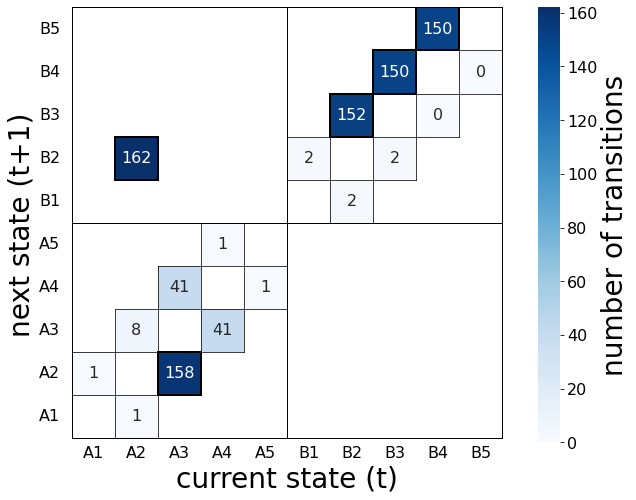

In [37]:
plt.close('all')
plt.figure(figsize=(10,8),facecolor=(1, 1, 1))
plt.axis('equal')
# plt.rcParams['axes.facecolor']='k'
sns.heatmap(a_value[2:,2:],cmap='Blues',annot=True,annot_kws={"size":16},fmt=".0f")
plt.xticks(np.linspace(0.5,9.5,10),['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5'],fontsize=16)
ax=plt.gca()
ax.tick_params('both', length=0)
ax.invert_yaxis()
cbar = ax.collections[0].colorbar  # Get the colorbar object
cbar.ax.tick_params(labelsize=16)
cbar.set_label('number of transitions',fontsize=28)
plt.plot([0,0],[0,10],'k-',lw=1)
plt.plot([5,5],[0,10],'k-',lw=1)
plt.plot([10,10],[0,10],'k-',lw=1)
plt.plot([0,10],[0,0],'k-',lw=1)
plt.plot([0,10],[5,5],'k-',lw=1)
plt.plot([0,10],[10,10],'k-',lw=1)
drawrect(2,1,lw=2)
drawrect(1,6,lw=2)
drawrect(6,7,lw=2)
drawrect(7,8,lw=2)
drawrect(8,9,lw=2)
for ii in range(0,10):
    if ii%5!=0:
        drawrect(ii,ii-1)
        drawrect(ii-1,ii) 
    if ii%5!=4:
        drawrect(ii,ii+1)
        drawrect(ii+1,ii) 
            
plt.xlabel('current state (t)',fontsize=28)
plt.ylabel('next state (t+1)',fontsize=28)
plt.ylim(-0.1,10)
plt.yticks(np.linspace(0.5,9.5,10),['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5'],fontsize=16,rotation=0)
# plt.title('Number of transitions, Start=A3, Goal=B1',fontsize=20)
plt.savefig('N transitions A3 to B5.svg', format='svg', dpi=1200)


In [169]:
normed_a_value[:,1]

array([       nan,        nan,        nan, 0.09090909,        nan,
              nan,        nan,        nan, 0.90909091,        nan,
              nan,        nan])

(array([ 0.,  2.,  0., 55.,  0.,  0.,  5., 68., 63.,  8.,  2.,  0., 52.,
         2.]),
 array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
 <BarContainer object of 14 artists>)

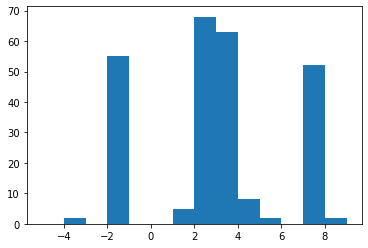

In [26]:
plt.close('all')
plt.hist(condition.CurrentState.values,bins=np.arange(-5,10))

In [21]:
center = beh[(beh.CurrentState.values%5==3) & (beh.SameGraph==0)]
center.reset_index(drop=True,inplace=True)
goalblock=np.insert(np.where(np.logical_or(np.diff(center.Goal.values)!=0, np.diff(center.Bridge.values)!=0))[0]+1,0,False)
goalblock=np.append(goalblock,len(center))

In [5]:
bridge2=beh[beh.Bridge==2]
bridge4=beh[beh.Bridge==4]
same_accuracy = []
diff_accuracy = []

In [6]:
goalblock = np.insert(np.where(np.logical_or(np.diff(bridge2.Goal.values)!=0, 
                                           np.diff(bridge2.Bridge.values)!=0))[0]+1,0,False)
goalblock = np.append(goalblock,len(bridge2))

for bb in range(1,len(goalblock)-1):
    
    goalPre=bridge2.iloc[goalblock[bb-1]].Goal
    goalPost=bridge2.iloc[goalblock[bb]].Goal
    
    if (goalPre-5.5)*(goalPost-5.5)>0:
        
        blockindex=np.arange(goalblock[bb],goalblock[bb+1])
        perf = bridge2.iloc[blockindex]
        perf_center = perf[(perf.CurrentState.values%5==3) & (perf.SameGraph==0)]
        same_accuracy.append(perf_center.Correct.values)
        
    else:
        
        blockindex=np.arange(goalblock[bb],goalblock[bb+1])
        perf = bridge2.iloc[blockindex]
        perf_bridge = perf[(perf.CurrentState.values==-2)|(perf.CurrentState.values==-7)]
        diff_accuracy.append(perf_bridge.Correct.values)

In [7]:
goalblock = np.insert(np.where(np.logical_or(np.diff(bridge4.Goal.values)!=0, 
                                           np.diff(bridge4.Bridge.values)!=0))[0]+1,0,False)
goalblock = np.append(goalblock,len(bridge4))

for bb in range(1,len(goalblock)-1):
    
    goalPre=bridge4.iloc[goalblock[bb-1]].Goal
    goalPost=bridge4.iloc[goalblock[bb]].Goal
    
    if (goalPre-5.5)*(goalPost-5.5)>0:
        
        blockindex=np.arange(goalblock[bb],goalblock[bb+1])
        perf = bridge4.iloc[blockindex]
        perf_center = perf[(perf.CurrentState.values%5==3) & (perf.SameGraph==0)]
        same_accuracy.append(perf_center.Correct.values)
        
    else:
        
        blockindex=np.arange(goalblock[bb],goalblock[bb+1])
        perf = bridge4.iloc[blockindex]
        perf_bridge = perf[(perf.CurrentState.values==-4)|(perf.CurrentState.values==-9)]
        diff_accuracy.append(perf_bridge.Correct.values)

In [8]:
sameacc=np.zeros((len(same_accuracy),5))
for ii in range(len(same_accuracy)):
    sameacc[ii,:]=same_accuracy[ii][0:5]
sameacc.mean(axis=0)

array([0.86486486, 0.89189189, 0.86486486, 0.86486486, 0.83783784])

In [17]:
sameacc.shape

(37, 5)

In [9]:
sameacc.std()/np.sqrt(sameacc.shape[0])

0.056202729179463395

In [10]:
same_episllon=np.zeros(len(same_accuracy))
for ii in range(len(same_accuracy)):
    same_episllon[ii]=same_accuracy[ii][-1]

In [11]:
diff_episllon=np.zeros(len(diff_accuracy))
for ii in range(len(diff_accuracy)):
    diff_episllon[ii]=diff_accuracy[ii][-1]

In [12]:
diffacc=np.zeros((len(diff_accuracy),5))
for ii in range(len(diff_accuracy)):
    diffacc[ii,:]=diff_accuracy[ii][0:5]
diffacc.mean(axis=0)

array([0.92857143, 0.92857143, 0.92857143, 0.92857143, 0.96428571])

In [18]:
diffacc.shape

(28, 5)

In [13]:
diffacc.std()/np.sqrt(diffacc.shape[0])

0.04635001202977567

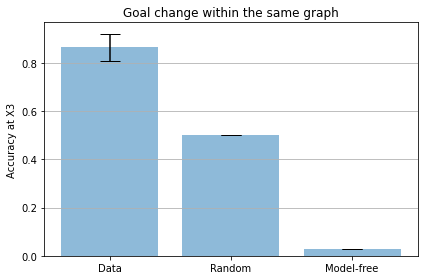

In [14]:
x_pos = np.arange(3)
CTEs = [sameacc[:,0].mean(),0.5,1-same_episllon.mean()]
error = [sameacc[:,0].std()/np.sqrt(len(sameacc)), 0, 0]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy at X3')
ax.set_xticks(x_pos)
ax.set_xticklabels(['Data','Random','Model-free'])
ax.set_title('Goal change within the same graph')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Goal change within the same graph')
plt.show()

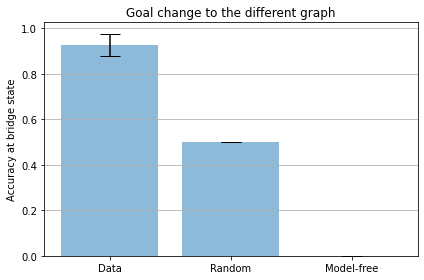

In [15]:
x_pos = np.arange(3)
CTEs = [diffacc[:,0].mean(),0.5,1-diff_episllon.mean()]
error = [diffacc[:,0].std()/np.sqrt(len(diffacc)), 0, 0]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy at bridge state')
ax.set_xticks(x_pos)
ax.set_xticklabels(['Data','Random','Model-free'])
ax.set_title('Goal change to the different graph')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Goal change to the different graph')
plt.show()

In [38]:
center = beh[(beh.CurrentState.values%5==3) & (beh.SameGraph==0)]
center.reset_index(drop=True,inplace=True)
goalblock=np.insert(np.where(np.logical_or(np.diff(center.Goal.values)!=0, np.diff(center.Bridge.values)!=0))[0]+1,0,False)
goalblock=np.append(goalblock,len(center))

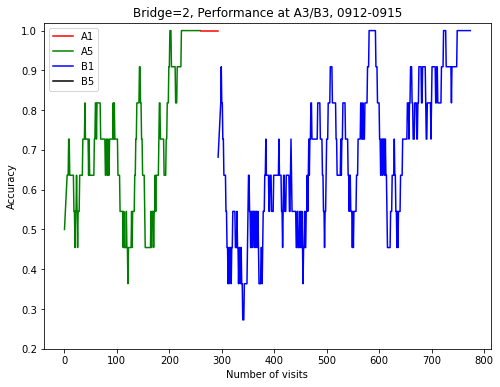

In [41]:
plt.close('all')
plt.figure(figsize=(8,6),facecolor=(1, 1, 1))
# colors=['r','','','','g','b','','','','k']
bridgecolors=['r','b']

for bb in range(len(goalblock)-1):
    blockindex=np.arange(goalblock[bb],goalblock[bb+1])
    plt.plot(blockindex,savgol_filter(center.iloc[blockindex]['Correct'].values,11,1),
            color=colors[int(center.iloc[blockindex[0]]['Goal'])-1])
#     plt.fill_between([blockindex[0],blockindex[-1]+1],[1,1],alpha=0.1,linewidth=0,
#                      color=bridgecolors[int(center.iloc[blockindex]['Bridge'].values[0]/2-1)])
    
plt.plot([0,0],[0,0],'r',label='A1')
plt.plot([0,0],[0,0],'g',label='A5')
plt.plot([0,0],[0,0],'b',label='B1')
plt.plot([0,0],[0,0],'k',label='B5')
# plt.fill_between([0,0],[0,0],color=bridgecolors[0],label='Bridge=2',alpha=0.1)
# plt.fill_between([0,0],[0,0],color=bridgecolors[1],label='Bridge=4',alpha=0.1)

plt.legend()
plt.ylim(0.2,1.02)
plt.title('Bridge=2, Performance at A3/B3, 0912-0915')
plt.xlabel('Number of visits')
plt.ylabel('Accuracy')
plt.savefig('Accuracy at A3 B3, Bono 0912-0915')

In [35]:
center[['Bridge','Goal','CurrentState','ChosenState','Correct']]

,Bridge,Goal,CurrentState,ChosenState,Correct
56,2,10,3,4,0
58,2,10,3,2,1
74,2,10,3,4,0
78,2,10,3,2,1
88,2,10,3,4,0
...,...,...,...,...,...
764,2,6,3,2,1
770,2,6,3,2,1
784,2,6,3,4,0
788,2,6,3,2,1


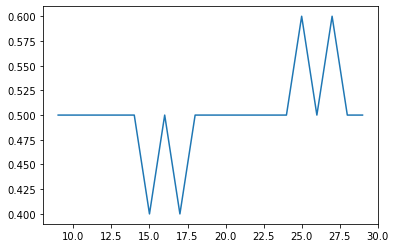

In [84]:
plt.close('all')
plt.plot(center.iloc[0:30]['Correct'].rolling(10).mean().values)

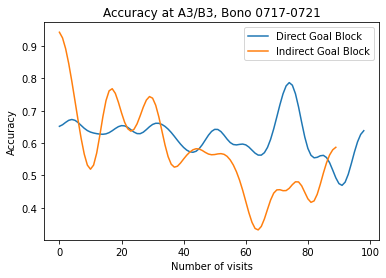

In [34]:
plt.close('all')
plt.plot(gaussian_filter1d(BlockLearning[BlockLearning.Direct==1].groupby('NumberofChoices').mean().Correct.values, sigma=3),
        label='Direct Goal Block')
plt.plot(gaussian_filter1d(BlockLearning[BlockLearning.Direct==0].groupby('NumberofChoices').mean().Correct.values, sigma=3),
        label='Indirect Goal Block')
plt.title('Accuracy at A3/B3, Bono 0717-0721')
plt.xlabel('Number of visits')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Accuracy at A3 B3, Bono 0717-0721')

Text(0.5, 1.0, 'First choice in a journey, center, Bono 0707')

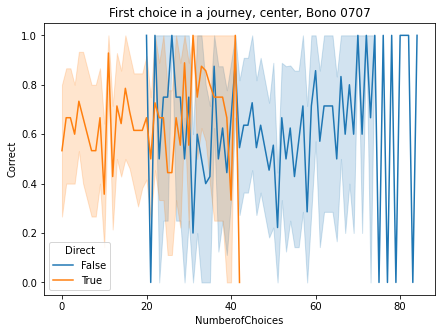

In [7]:
df = BlockLearning.copy()
plt.close('all')
fig=plt.figure(figsize=(7,5),facecolor=(1, 1, 1))
sns.lineplot(data=df,
            x='NumberofChoices',y='Correct',hue='Direct')
# plt.xlim(0,5)
plt.title('First choice in a journey, center, Bono 0707')
# plt.savefig('First choice in a journey, open, first blocks, 0623')

In [7]:
plt.close('all')
sns.lineplot(data=bridgeentrance_learning, x='NumberofVisits', y='Correct',
             hue='BridgeEntrance', errorbar=('se',0.5),palette='flare',ax=ax10)
ax10.set_title('Average across goal sub-blocks, Entrances')
ax10.set_xlabel('Number of Visits')
plt.xlim(0,10)

NameError: name 'bridgeentrance_learning' is not defined

In [5]:
def Jounrey(df):

    BlockLearning=pd.DataFrame()

    for _, bridgeNum in enumerate(np.unique(df.BridgeBlockNum.values)):   

        bridgeBlock=df[df.BridgeBlockNum==bridgeNum]
        goalseq=bridgeBlock.Goal.unique()
        direct=np.floor((goalseq[0]-1)/5)

        for gg, goalNum in enumerate(np.unique(bridgeBlock.GoalBlockNum.values)):

            goalBlock=bridgeBlock[bridgeBlock.GoalBlockNum==goalNum]

            for ee, epiNum in enumerate(np.unique(goalBlock.EpisodeNum.values)):

                journey=goalBlock[goalBlock.EpisodeNum==epiNum]

                temp=journey.copy()
                temp['Direct']=np.ones(len(journey))*(np.floor((temp.Goal.values-1)/5)==direct)
                temp['NumberofChoices']=temp.reset_index().index
                temp['NumberofJourneys']=ee

                BlockLearning=BlockLearning.append(temp,ignore_index=True)
            
    return BlockLearning

In [9]:
def Jounrey(df):

    BlockLearning=pd.DataFrame()

    for _, bridgeNum in enumerate(np.unique(df.BridgeBlockNum.values)):   

        bridgeBlock=df[df.BridgeBlockNum==bridgeNum]
        goalseq=bridgeBlock.Goal.unique()
        direct=np.floor((goalseq-1)/5)==np.floor((goalseq[0]-1)/5)
        if len(direct)>1:
            if direct[1]:
                dirBlock=[1,2,1,2]
                ABAB=0
            else:
                dirBlock=[1,1,2,2]
                ABAB=1
        else:
            dirBlock=[1]
            ABAB=np.nan

        for gg, goalNum in enumerate(np.unique(bridgeBlock.GoalBlockNum.values)):

            goalBlock=bridgeBlock[bridgeBlock.GoalBlockNum==goalNum]

            for ee, epiNum in enumerate(np.unique(goalBlock.EpisodeNum.values)):

                journey=goalBlock[goalBlock.EpisodeNum==epiNum]

                temp=journey.copy()
                temp['Direct']=np.ones(len(journey))*direct[gg]
                temp['DirectionBlock']=np.ones(len(journey))*dirBlock[gg]
                temp['NumberofChoices']=temp.reset_index().index
                temp['NumberofJourneys']=ee
                temp['ABAB']=ABAB

                BlockLearning=BlockLearning.append(temp,ignore_index=True)
            
    return BlockLearning

Text(0.5, 1.0, 'Performance at Bridge Entrance\nMonkey D')

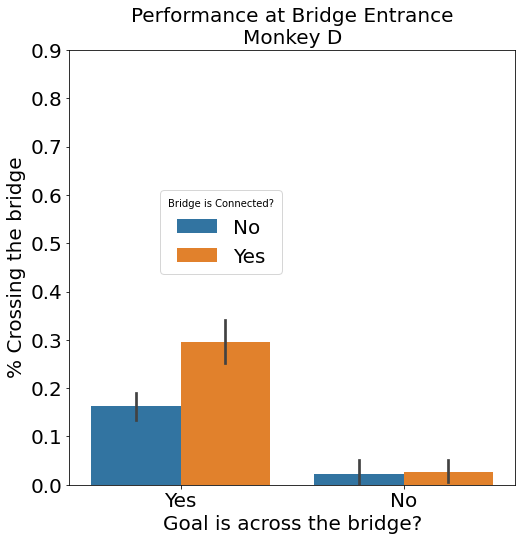

In [99]:
bridgeEntrance = beh[beh.BridgeEntrance>-1].copy()
bridgeEntrance['ChoosingBridge'] = bridgeEntrance['Choice']==0
plt.rc('legend',fontsize=20)
fig=plt.figure(figsize=(8,8),facecolor=(1, 1, 1))

g = sns.barplot(data=bridgeEntrance,x='SameGraph',y='ChoosingBridge',hue='BridgeEntrance')
g.legend_.set_title('Bridge is Connected?')
new_labels = ['No', 'Yes']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
g.legend_.set_bbox_to_anchor((0.5, 0.7))

plt.xlabel('Goal is across the bridge?',fontsize=20)
plt.ylabel('% Crossing the bridge',fontsize=20)
plt.xticks([0,1],['Yes','No'],fontsize=20)
plt.yticks(np.linspace(0,0.9,10),fontsize=20)
plt.title('Performance at Bridge Entrance\nMonkey D',fontsize=20)
# plt.savefig('Dylan Bridge entrance')

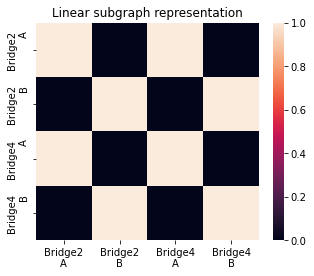

In [44]:
# A=[[1,1,0,0],[1,1,0,0],[0,0,1,1],[0,0,1,1]]
A=[[1,0,1,0],[0,1,0,1],[1,0,1,0],[0,1,0,1]]
plt.close('all')
fig=plt.figure(figsize=(5,4),facecolor=(1, 1, 1))
sns.heatmap(A)
plt.xticks(np.arange(0.5,4.5,1),['Bridge2\nA','Bridge2\nB','Bridge4\nA','Bridge4\nB'])
plt.yticks(np.arange(0.5,4.5,1),['Bridge2\nA','Bridge2\nB','Bridge4\nA','Bridge4\nB'])
plt.title('Linear subgraph representation')
plt.savefig('Dylan RSA Linear subgraph representation')

In [46]:
X3b4=beh[(beh.CurrentState%5==3)&(beh.SameGraph==0)&(beh.Bridge==4)].copy()
X3b2=beh[(beh.CurrentState%5==3)&(beh.SameGraph==0)&(beh.Bridge==2)].copy()
X3b2['Correct']=1-X3b2['Correct']
X3=pd.concat([X3b4,X3b2])

Text(0.5, 1.0, 'Performance at X3')

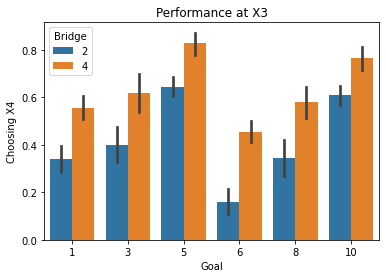

In [49]:
plt.close('all')
sns.barplot(data=X3,x='Goal',y='Correct',hue='Bridge')
plt.ylabel('Choosing X4')
plt.title('Performance at X3')

In [4]:
mypath='C:/Users/liang/Documents/Thesis/LinearGraph/D/ControlTrials/'
stateNames=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5']
beh = pd.DataFrame()
bridgeentrance_learning = pd.DataFrame()
bridgeentrance5 = pd.DataFrame()
closedentrance5 = pd.DataFrame()
openentrance5 = pd.DataFrame()

for ii,f in enumerate(listdir(mypath)):
    
    beh_temp = pd.read_csv(join(mypath, f), sep=",")
    beh_temp.reset_index(drop=True, inplace=True)
    beh_temp.insert(loc = 0,
          column = 'SessionNum',
          value = ii)
    beh_temp=beh_temp[beh_temp.ControlTrial==0]
    beh = pd.concat([beh,beh_temp])

    bridgeEntrance = beh_temp[beh_temp.BridgeEntrance>-1].copy()
    bridgeEntrance['ChoosingBridge'] = bridgeEntrance['Choice']==0
    bridgeentrance_learning_temp = calculateBlockBridgeEntrance(bridgeEntrance[bridgeEntrance.SameGraph==0])
#     bridgeentrance_learning_temp = calculateBlockBridgeEntrance(beh_temp[beh_temp.SameGraph==0])
    
    bridgeentrance5_temp = bridgeentrance_learning_temp[bridgeentrance_learning_temp.NumberofVisits<5]
    closedentrance5_temp = bridgeentrance5_temp[bridgeentrance5_temp.BridgeEntrance==0].groupby(['BridgeBlockNum','GoalBlockNum']).mean()
    openentrance5_temp = bridgeentrance5_temp[bridgeentrance5_temp.BridgeEntrance==1].groupby(['BridgeBlockNum','GoalBlockNum']).mean()

    bridgeentrance_learning = pd.concat([bridgeentrance_learning,bridgeentrance_learning_temp])
    bridgeentrance5 = pd.concat([bridgeentrance5,bridgeentrance5_temp])
    closedentrance5 = pd.concat([closedentrance5,closedentrance5_temp])
    openentrance5 = pd.concat([openentrance5,openentrance5_temp])
    
triallength=pd.concat([beh.groupby(['SessionNum','TotalEpisodeNum']).count().TrialNum,
                  beh.groupby(['SessionNum','TotalEpisodeNum']).mean()[['Bridge','Goal','Start','EpisodeLength']]],
                  axis=1).groupby(['Bridge','Goal','Start']).mean().reset_index()

b2_cmap=triallength[triallength.Bridge==2].groupby(['Goal','Start']).mean()['TrialNum'].reset_index().pivot(index='Goal', columns='Start', values='TrialNum')
b4_cmap=triallength[triallength.Bridge==4].groupby(['Goal','Start']).mean()['TrialNum'].reset_index().pivot(index='Goal', columns='Start', values='TrialNum')
nondeadend=beh[((beh.CurrentState.values%5>1) & (beh.CurrentState.values>0)) | (beh.BridgeState==1)]

fractal_learning = calculateBlock(beh[(beh.CurrentState.values%5>1) & (beh.CurrentState.values>0)])
bridge_learning = calculateBlock(beh[beh.BridgeState==1])

In [75]:
mypath='C:/Users/liang/Documents/Thesis/LinearGraph/D/DataCollection/'
stateNames=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5']
beh = pd.DataFrame()
bridgeentrance_learning2 = pd.DataFrame()
bridgeentrance5 = pd.DataFrame()
closedentrance5 = pd.DataFrame()
openentrance5 = pd.DataFrame()

for ii,f in enumerate(listdir(mypath)):
    
    beh_temp = pd.read_csv(join(mypath, f), sep=",")
    beh_temp.reset_index(drop=True, inplace=True)
    beh_temp.insert(loc = 0,
          column = 'SessionNum',
          value = ii)
#     beh_temp=beh_temp[beh_temp.ControlTrial==0]
    beh = pd.concat([beh,beh_temp])

    bridgeEntrance = beh_temp[beh_temp.BridgeEntrance>-1].copy()
    bridgeEntrance['ChoosingBridge'] = bridgeEntrance['Choice']==0
    bridgeentrance_learning_temp = calculateBlockBridgeEntrance(bridgeEntrance[bridgeEntrance.SameGraph==0])
#     bridgeentrance_learning_temp = calculateBlockBridgeEntrance(beh_temp[beh_temp.SameGraph==0])
    
    bridgeentrance5_temp = bridgeentrance_learning_temp[bridgeentrance_learning_temp.NumberofVisits<5]
    closedentrance5_temp = bridgeentrance5_temp[bridgeentrance5_temp.BridgeEntrance==0].groupby(['BridgeBlockNum','GoalBlockNum']).mean()
    openentrance5_temp = bridgeentrance5_temp[bridgeentrance5_temp.BridgeEntrance==1].groupby(['BridgeBlockNum','GoalBlockNum']).mean()

    bridgeentrance_learning2 = pd.concat([bridgeentrance_learning2,bridgeentrance_learning_temp])
    bridgeentrance5 = pd.concat([bridgeentrance5,bridgeentrance5_temp])
    closedentrance5 = pd.concat([closedentrance5,closedentrance5_temp])
    openentrance5 = pd.concat([openentrance5,openentrance5_temp])
    
triallength=pd.concat([beh.groupby(['SessionNum','TotalEpisodeNum']).count().TrialNum,
                  beh.groupby(['SessionNum','TotalEpisodeNum']).mean()[['Bridge','Goal','Start','EpisodeLength']]],
                  axis=1).groupby(['Bridge','Goal','Start']).mean().reset_index()

b2_cmap=triallength[triallength.Bridge==2].groupby(['Goal','Start']).mean()['TrialNum'].reset_index().pivot(index='Goal', columns='Start', values='TrialNum')
b4_cmap=triallength[triallength.Bridge==4].groupby(['Goal','Start']).mean()['TrialNum'].reset_index().pivot(index='Goal', columns='Start', values='TrialNum')
nondeadend=beh[((beh.CurrentState.values%5>1) & (beh.CurrentState.values>0)) | (beh.BridgeState==1)]

fractal_learning = calculateBlock(beh[(beh.CurrentState.values%5>1) & (beh.CurrentState.values>0)])
bridge_learning = calculateBlock(beh[beh.BridgeState==1])

<AxesSubplot:xlabel='GoalBlockNum', ylabel='Correct'>

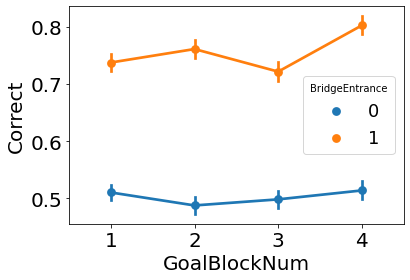

In [150]:
plt.close('all')
sns.pointplot(data=bridgeentrance_learning[bridgeentrance_learning.ABAB==1],x='GoalBlockNum',y='Correct',hue='BridgeEntrance',
              errorbar=('se',0.5))
# ax11.set_title('Average across bridge blocks, Entrances')
# ax11.set_xlabel('Number of goal sub-blocks')

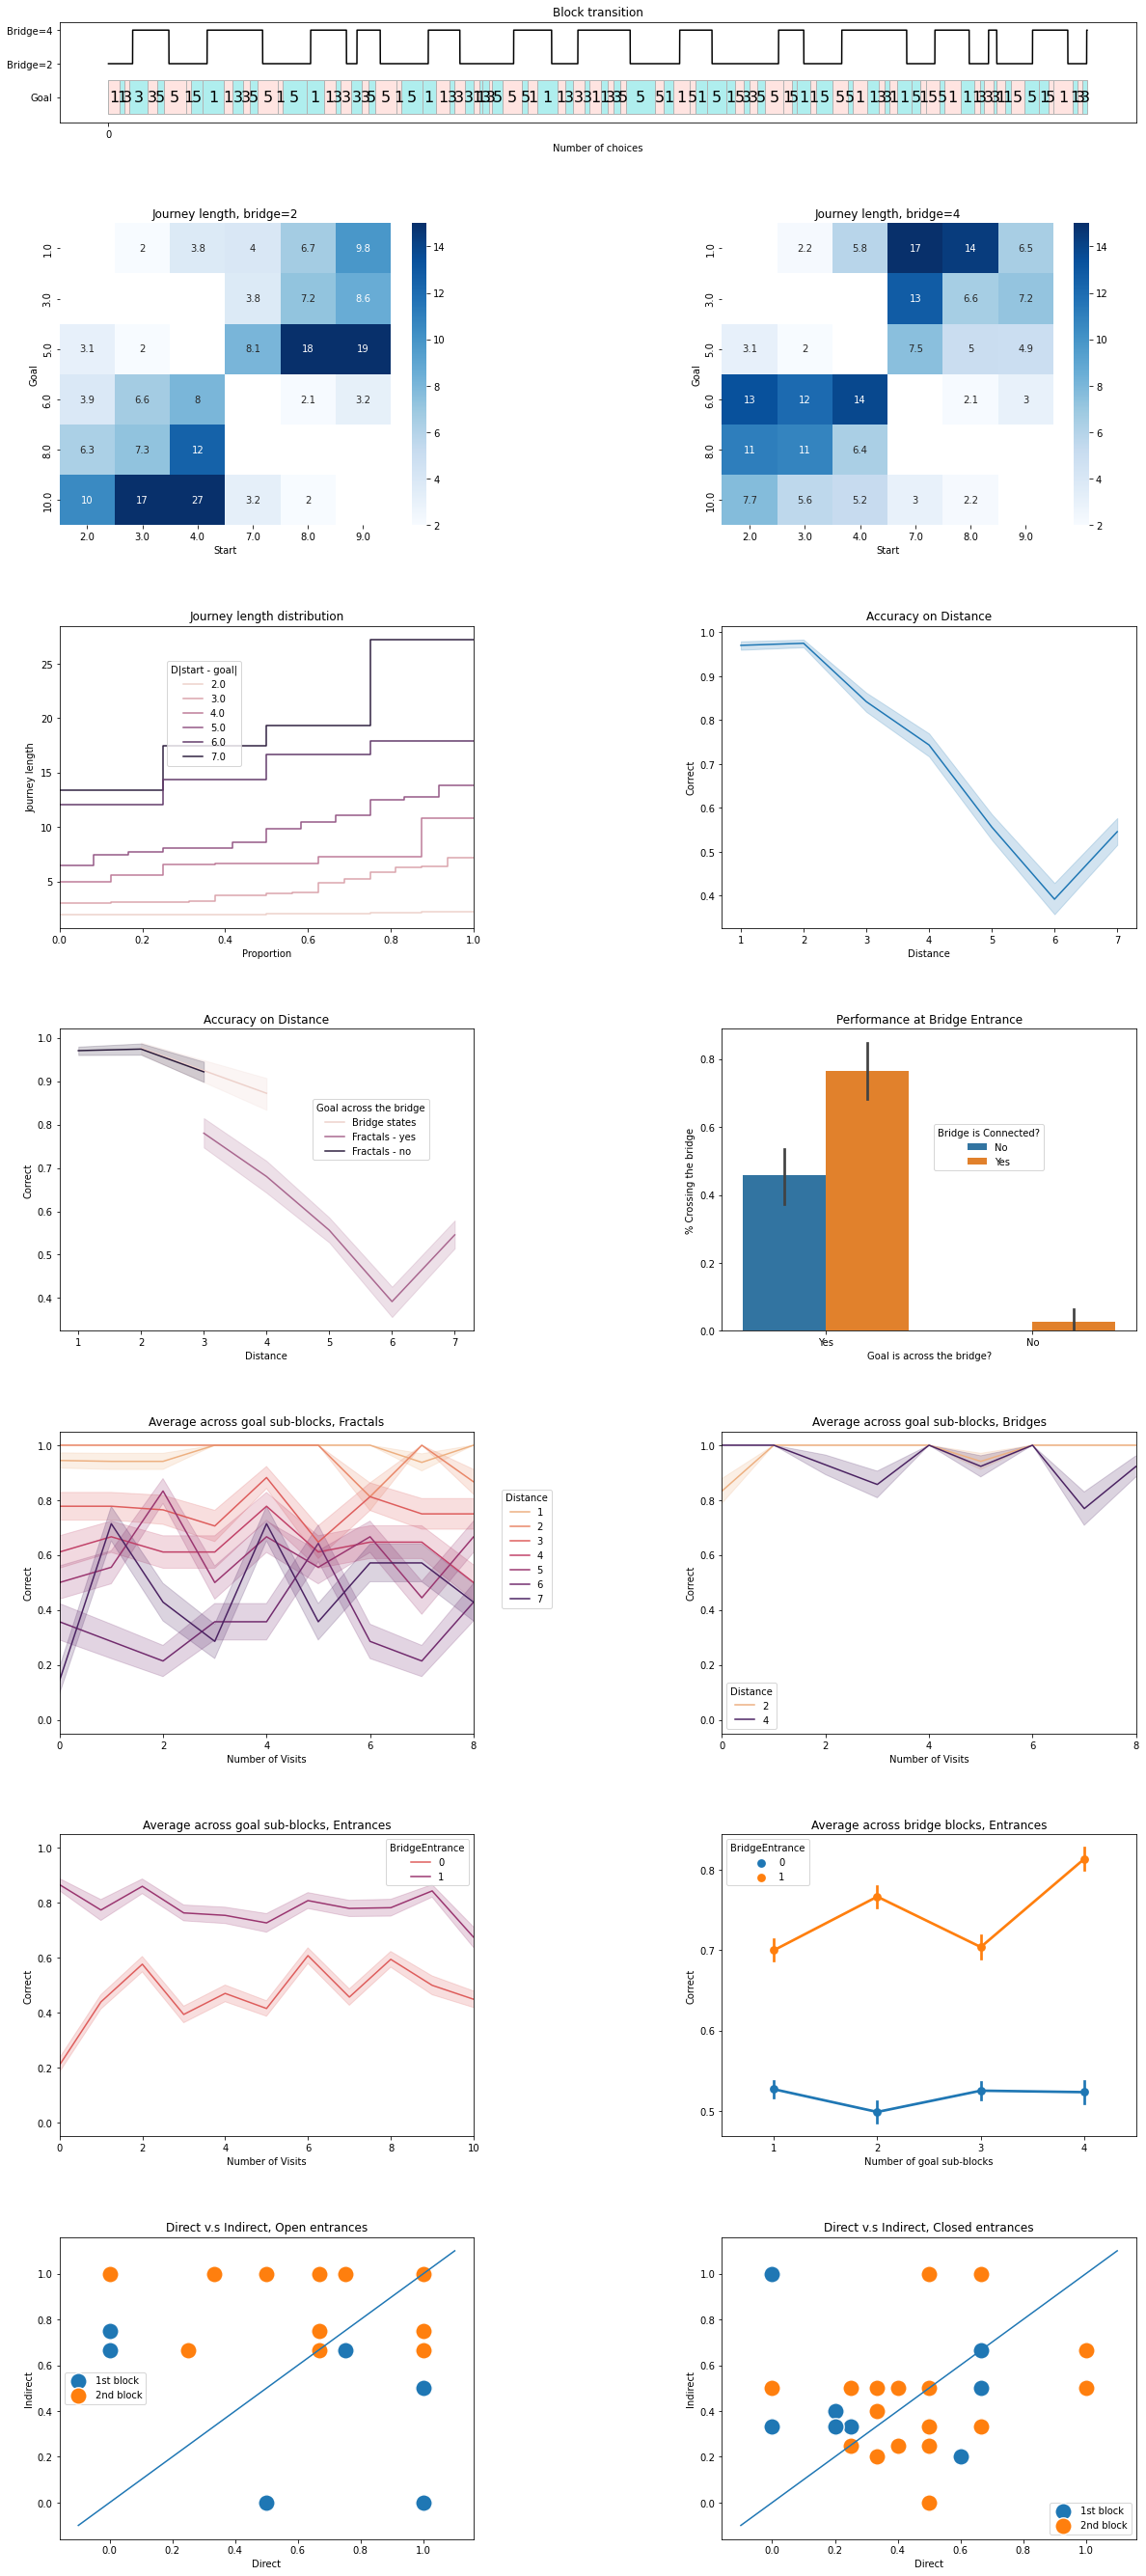

In [6]:
# import behavior
# filepath='C:/Users/liang/Documents/Thesis/LinearGraph/D/DataCollection/LinearBridge_2023_06_05__13_42_37.beh.txt'
# beh = pd.read_csv(filepath, sep=",")
# beh.reset_index(drop=True, inplace=True)
# # beh=beh[beh.ControlTrial==0]
# beh['SessionNum']=0

# stateNames=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5']

# triallength=pd.concat([beh.groupby(['TotalEpisodeNum']).count().TrialNum,
#                       beh.groupby(['TotalEpisodeNum']).mean()[['Bridge','Goal','Start','EpisodeLength']]],
#                       axis=1).groupby(['Bridge','Goal','Start']).mean().reset_index()

# b2_cmap=triallength[triallength.Bridge==2].groupby(['Goal','Start']).mean()['TrialNum'].reset_index().pivot(index='Goal', columns='Start', values='TrialNum')
# b4_cmap=triallength[triallength.Bridge==4].groupby(['Goal','Start']).mean()['TrialNum'].reset_index().pivot(index='Goal', columns='Start', values='TrialNum')

# nondeadend=beh[((beh.CurrentState.values%5>1) & (beh.CurrentState.values>0)) | (beh.BridgeState==1)]

# fractal_learning = calculateBlock(beh[(beh.CurrentState.values%5>1) & (beh.CurrentState.values>0)])
# bridge_learning = calculateBlock(beh[beh.BridgeState==1])

# bridgeEntrance=beh[beh.BridgeEntrance>-1].copy()
# bridgeEntrance['ChoosingBridge']=bridgeEntrance['Choice']==0
# bridgeentrance_learning = calculateBlockBridgeEntrance(bridgeEntrance[bridgeEntrance.SameGraph==0])

# bridgeentrance5=bridgeentrance_learning[bridgeentrance_learning.NumberofVisits<5]
# closedentrance5=bridgeentrance5[bridgeentrance5.BridgeEntrance==0].groupby(['BridgeBlockNum','GoalBlockNum']).mean()
# openentrance5=bridgeentrance5[bridgeentrance5.BridgeEntrance==1].groupby(['BridgeBlockNum','GoalBlockNum']).mean()

fig=plt.figure(figsize=(20,48),facecolor=(1, 1, 1))
gs = gridspec.GridSpec(13, 2,wspace=0.6,hspace=1) 
ax1 = plt.subplot(gs[0,:])

Goals=beh.Goal.values
GoalBlocks=np.append(0,np.array(np.where((np.diff(Goals)!=0)==True))+1)

for bb in range(len(GoalBlocks)):
    
    thisgoal=Goals[GoalBlocks[bb]]
    
    if thisgoal<5.5:
        goal_color='mistyrose'
    else:
        goal_color='paleturquoise'
    
    if bb!=(len(GoalBlocks)-1):
        ax1.fill_between([GoalBlocks[bb],GoalBlocks[bb+1]],[-1,-1],[1,1],color=goal_color,edgecolor=[0.7,0.7,0.7])
        ax1.text(np.mean((GoalBlocks[bb],GoalBlocks[bb+1])),0,str((thisgoal-1)%5+1),ha='center',va='center',fontsize=16)
    else:
        ax1.fill_between([GoalBlocks[bb],len(beh)],[-1,-1],[1,1],color=goal_color,edgecolor=[0.7,0.7,0.7])
        ax1.text(np.mean((GoalBlocks[bb],len(beh))),0,str((thisgoal-1)%5+1),ha='center',va='center',fontsize=16)

ax1.plot(beh.Bridge.values,'k-')
ax1.set_xticks(np.arange(0,len(GoalBlocks),200))
ax1.set_xticklabels(np.arange(0,len(GoalBlocks),200))
ax1.set_yticks([0,2,4])
ax1.set_yticklabels(['Goal','Bridge=2','Bridge=4'])
ax1.set_xlabel('Number of choices')
ax1.set_title('Block transition')
ax1.set_ylim(-1.5,4.5)

ax6=fig.add_subplot(gs[1:3,0])
sns.heatmap(b2_cmap,cmap='Blues',vmin=2,vmax=15,annot=True,ax=ax6)
ax6.set_title('Journey length, bridge=2')

ax7=fig.add_subplot(gs[1:3,1])
sns.heatmap(b4_cmap,cmap='Blues',vmin=2,vmax=15,annot=True,ax=ax7)
ax7.set_title('Journey length, bridge=4')

ax2=fig.add_subplot(gs[3:5,0])
g=sns.ecdfplot(data=triallength, y= 'TrialNum', hue="EpisodeLength",ax=ax2)
g.legend_.set_title('D|start - goal|')
g.legend_.set_bbox_to_anchor((0.15, 0.3,0.4,0.6))
ax2.set_title('Journey length distribution')
ax2.set_ylabel('Journey length')

ax5=fig.add_subplot(gs[3:5,1])
sns.lineplot(data=nondeadend,x='Distance',y='Correct',ax=ax5)
ax5.set_title('Accuracy on Distance')

ax5=fig.add_subplot(gs[5:7,0])
g=sns.lineplot(data=nondeadend,x='Distance',y='Correct',hue='SameGraph',ax=ax5)
g.legend_.set_title('Goal across the bridge')
g.legend_.set_bbox_to_anchor((0.6, 0.55))
new_labels = ['Bridge states', 'Fractals - yes','Fractals - no']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
ax5.set_title('Accuracy on Distance')    

ax3=fig.add_subplot(gs[5:7,1])
g = sns.barplot(data=bridgeEntrance,x='SameGraph',y='ChoosingBridge',hue='BridgeEntrance',ax=ax3)
g.legend_.set_title('Bridge is Connected?')
new_labels = ['No', 'Yes']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
g.legend_.set_bbox_to_anchor((0.5, 0.7))
ax3.set_xlabel('Goal is across the bridge?')
ax3.set_ylabel('% Crossing the bridge')
ax3.set_xticks([0,1])
ax3.set_xticklabels(['Yes','No'])
ax3.set_title('Performance at Bridge Entrance')

ax8=fig.add_subplot(gs[7:9,0])
g=sns.lineplot(data=fractal_learning, x='NumberofVisits', y='Correct',hue='Distance',
             errorbar=('se',0.5),palette='flare',ax=ax8)
ax8.set_title('Average across goal sub-blocks, Fractals')
ax8.set_xlabel('Number of Visits')
g.legend_.set_bbox_to_anchor((1,0.4,0.2,0.5))
plt.xlim(0,8)

ax9=fig.add_subplot(gs[7:9,1])
sns.lineplot(data=bridge_learning, x='NumberofVisits', y='Correct',hue='Distance',
             errorbar=('se',0.5),palette='flare',ax=ax9)
ax9.set_title('Average across goal sub-blocks, Bridges')
ax9.set_xlabel('Number of Visits')
plt.xlim(0,8)

ax10=fig.add_subplot(gs[9:11,0])
sns.lineplot(data=bridgeentrance_learning, x='NumberofVisits', y='Correct',
             hue='BridgeEntrance', errorbar=('se',0.5),palette='flare',ax=ax10)
ax10.set_title('Average across goal sub-blocks, Entrances')
ax10.set_xlabel('Number of Visits')
plt.xlim(0,10)

ax11=fig.add_subplot(gs[9:11,1])
sns.pointplot(data=bridgeentrance_learning,x='GoalBlockNum',y='Correct',hue='BridgeEntrance',
              errorbar=('se',0.5),ax=ax11)
ax11.set_title('Average across bridge blocks, Entrances')
ax11.set_xlabel('Number of goal sub-blocks')

ax12=fig.add_subplot(gs[11:13,0])
x=openentrance5[(openentrance5.Acquisition==1) & (openentrance5.DirectionBlock==1)].Correct.values
y=openentrance5[(openentrance5.Acquisition==0) & (openentrance5.DirectionBlock==1)].Correct.values
sns.scatterplot(x=x[:np.min((len(x),len(y)))],
               y=y[:np.min((len(x),len(y)))],
               s=300,ax=ax12)
x=openentrance5[(openentrance5.Acquisition==1) & (openentrance5.DirectionBlock==2)].Correct.values
y=openentrance5[(openentrance5.Acquisition==0) & (openentrance5.DirectionBlock==2)].Correct.values
sns.scatterplot(x=x[:np.min((len(x),len(y)))],
               y=y[:np.min((len(x),len(y)))],
               s=300,ax=ax12)
plt.legend(['1st block','2nd block'])
plt.plot([-0.1,1.1],[-0.1,1.1])
ax12.set_title('Direct v.s Indirect, Open entrances')
ax12.set_xlabel('Direct')
ax12.set_ylabel('Indirect')

ax13=fig.add_subplot(gs[11:13,1])
x=closedentrance5[(closedentrance5.Acquisition==1) & (closedentrance5.DirectionBlock==1)].Correct.values
y=closedentrance5[(closedentrance5.Acquisition==0) & (closedentrance5.DirectionBlock==1)].Correct.values             
sns.scatterplot(x=x[:np.min((len(x),len(y)))],
               y=y[:np.min((len(x),len(y)))],
               s=300,ax=ax13)
x=closedentrance5[(closedentrance5.Acquisition==1) & (closedentrance5.DirectionBlock==2)].Correct.values
y=closedentrance5[(closedentrance5.Acquisition==0) & (closedentrance5.DirectionBlock==2)].Correct.values             
sns.scatterplot(x=x[:np.min((len(x),len(y)))],
               y=y[:np.min((len(x),len(y)))],
                s=300,ax=ax13)
plt.legend(['1st block','2nd block'])
plt.plot([-0.1,1.1],[-0.1,1.1])
ax13.set_title('Direct v.s Indirect, Closed entrances')
ax13.set_xlabel('Direct')
ax13.set_ylabel('Indirect')

s0=18
s1=20
s2=20
plt.rc('axes', labelsize=s1)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize=s1)    # fontsize of the tick labels
plt.rc('legend', fontsize=s0)    # legend fontsize
plt.rc('figure', titlesize=s2)  # fontsize of the figure title

plt.savefig('Dylan_'+filepath[-41:-18])
# plt.savefig('Dylan summary')

In [3]:
def  calculateBlock(df):

    BlockLearning=pd.DataFrame()
    for _, bridgeNum in enumerate(np.unique(df.BridgeBlockNum.values)):   

        bridgeBlock=df[df.BridgeBlockNum==bridgeNum]
        goalseq=bridgeBlock.Goal.unique()
        acquisition=np.floor((goalseq-1)/5)==np.floor((goalseq[0]-1)/5)
        if len(acquisition)>1:
            if acquisition[1]:
                sameDirAsPre=[np.nan,1,0,1]
                dirBlock=[1,2,1,2]
            else:
                sameDirAsPre=[np.nan,0,0,0]
                dirBlock=[1,1,2,2]
            
        for gg, goalNum in enumerate(np.unique(bridgeBlock.GoalBlockNum.values)):

            goalBlock=bridgeBlock[bridgeBlock.GoalBlockNum==goalNum]
            temp=goalBlock[['BridgeBlockNum','Bridge','GoalBlockNum','Goal','CurrentState','Distance','Correct','SameGraph']].copy()
            temp['Acquisition']=np.ones(len(goalBlock))*acquisition[gg]
            temp['GoalSameSubgraphAsPreivious']=np.ones(len(goalBlock))*sameDirAsPre[gg]
            temp['DirectionBlock']=np.ones(len(goalBlock))*dirBlock[gg]

            for _, dis in enumerate(np.unique(temp.Distance.values)):
                tempbydis=temp[temp.Distance==dis].copy()
                tempbydis['NumberofVisits']=tempbydis.reset_index().index

                BlockLearning=BlockLearning.append(tempbydis,ignore_index=True)
            
    return BlockLearning


In [98]:
A = calculateBlockBridgeEntrance(beh)

In [101]:
A[(A.SameGraph==0)&(A.TrialNum==1)]

,BridgeBlockNum,Bridge,GoalBlockNum,EpisodeNum,TrialNum,Goal,CurrentState,Distance,Correct,SameGraph,BridgeEntrance,Acquisition,GoalSameSubgraphAsPreivious,DirectionBlock,NumberofVisits,ABAB
0,1,4,1,1,1,10,2,5,1,0,0,1.0,NaN,1.0,0,0
12,1,4,1,3,1,10,4,3,1,0,1,1.0,NaN,1.0,12,0
15,1,4,1,4,1,10,3,4,0,0,-1,1.0,NaN,1.0,15,0
29,1,4,1,6,1,10,2,5,0,0,0,1.0,NaN,1.0,29,0
36,1,4,1,7,1,10,4,3,0,0,1,1.0,NaN,1.0,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,5,4,2,3,1,1,9,5,1,0,1,0.0,0.0,1.0,36,1
1013,5,4,2,4,1,1,7,7,0,0,0,0.0,0.0,1.0,41,1
1027,5,4,2,6,1,1,9,5,1,0,1,0.0,0.0,1.0,55,1
1032,5,4,2,7,1,1,7,7,0,0,0,0.0,0.0,1.0,60,1


In [92]:
beh

,BridgeBlockNum,GoalBlockNum,TotalGoalBlockNum,EpisodeNum,TotalEpisodeNum,TrialNum,TotalTrialNum,Bridge,Goal,Start,...,TrialComplete,ChosenState,Correct,TrialEnd,GoalPeriodEntry,ForePeriodEntry,DelayperiodEntry,DelayperiodExit,FeedbackPeriodEntry,GlobalStart
0,1,1,1,1,1,1,1,4,10,2,...,0,3,1,0,0,4845,5595,6178,6911,124.278393
1,1,1,1,1,1,2,2,4,10,2,...,0,4,1,0,0,8111,8644,9444,10044,124.278393
2,1,1,1,1,1,3,3,4,10,2,...,0,-4,1,0,0,11243,11776,12409,13059,124.278393
3,1,1,1,1,1,6,6,4,10,2,...,0,4,0,0,0,21090,21790,22456,23206,124.278393
4,1,1,1,1,1,7,7,4,10,2,...,0,5,0,0,0,24405,24939,25572,26371,124.278393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,5,2,18,7,161,10,1160,4,1,7,...,0,1,1,0,7249216,7280272,7280805,7281572,7282205,124.278393
1041,5,2,18,8,162,1,1161,4,1,3,...,0,2,1,0,7284504,7286204,7286903,7287470,7288303,124.278393
1042,5,2,18,8,162,2,1162,4,1,3,...,0,1,1,0,7284504,7289503,7290102,7290802,7291535,124.278393
1043,5,2,18,9,163,1,1163,4,1,8,...,0,7,0,0,7293835,7295534,7296200,7296900,7297700,124.278393


In [2]:
def  calculateBlockBridgeEntrance(df):

    BlockLearning=pd.DataFrame()
    for _, bridgeNum in enumerate(np.unique(df.BridgeBlockNum.values)):   

        bridgeBlock=df[df.BridgeBlockNum==bridgeNum]
        goalseq=bridgeBlock.Goal.unique()
        acquisition=np.floor((goalseq-1)/5)==np.floor((goalseq[0]-1)/5)
        if len(acquisition)>1:
            if acquisition[1]:
                sameDirAsPre=[np.nan,1,0,1]
                dirBlock=[1,2,1,2]
                ABAB=0
            else:
                sameDirAsPre=[np.nan,0,0,0]
                dirBlock=[1,1,2,2]
                ABAB=1
            
        for gg, goalNum in enumerate(np.unique(bridgeBlock.GoalBlockNum.values)):

            goalBlock=bridgeBlock[bridgeBlock.GoalBlockNum==goalNum]
            temp=goalBlock[['SessionNum','BridgeBlockNum','Bridge','GoalBlockNum','EpisodeNum','TrialNum','Goal','CurrentState','Distance','Correct','ChoosingBridge','SameGraph','BridgeEntrance']].copy()
            temp['Acquisition']=np.ones(len(goalBlock))*acquisition[gg]
            temp['GoalSameSubgraphAsPreivious']=np.ones(len(goalBlock))*sameDirAsPre[gg]
            temp['DirectionBlock']=np.ones(len(goalBlock))*dirBlock[gg]
            temp['NumberofVisits']=temp.reset_index().index
            temp['ABAB']=ABAB

            BlockLearning=BlockLearning.append(temp,ignore_index=True)
            
#             for _, connect in enumerate(np.unique(temp.BridgeEntrance.values)):
                
#                 tempbyconnect=temp[temp.BridgeEntrance==connect].copy()
#                 tempbyconnect['NumberofVisits']=tempbyconnect.reset_index().index
            
#                 BlockLearning=BlockLearning.append(tempbyconnect,ignore_index=True)
            
    return BlockLearning